## Arkadiusz Pytlik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# wczytanie oryginalnych danych
df = pd.read_csv("../Original Data/tb.csv")
df

,iso2,year,new_sp,new_sp_m04,new_sp_m514,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,...,new_sp_f04,new_sp_f514,new_sp_f014,new_sp_f1524,new_sp_f2534,new_sp_f3544,new_sp_f4554,new_sp_f5564,new_sp_f65,new_sp_fu
0,AD,1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AD,1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AD,1991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AD,1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AD,1993,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5764,ZW,2004,14581.0,NaN,NaN,187.0,833.0,2908.0,2298.0,1056.0,...,NaN,NaN,225.0,1140.0,2858.0,1565.0,622.0,214.0,111.0,NaN
5765,ZW,2005,13155.0,NaN,NaN,210.0,837.0,2264.0,1855.0,762.0,...,NaN,NaN,269.0,1136.0,2242.0,1255.0,578.0,193.0,603.0,NaN
5766,ZW,2006,12718.0,NaN,NaN,215.0,736.0,2391.0,1939.0,896.0,...,NaN,NaN,237.0,1020.0,2424.0,1355.0,632.0,230.0,96.0,NaN
5767,ZW,2007,10583.0,6.0,132.0,138.0,500.0,3693.0,0.0,716.0,...,7.0,178.0,185.0,739.0,3311.0,0.0,553.0,213.0,90.0,NaN


In [2]:
# zmiana nazw kolumn
df = df.rename(columns = {'iso2': 'country'})

# usuwanie poszczególnych kolumn
del df["new_sp"]
del df["new_sp_mu"]
del df["new_sp_fu"]

In [3]:
# nazwy kolumn z tabeli
col_names = list(df.columns)

# melting
df_melt = pd.melt(df, id_vars =['country', 'year'], value_vars = col_names[2:], var_name ='column', value_name ='cases')
df_melt

,country,year,column,cases
0,AD,1989,new_sp_m04,NaN
1,AD,1990,new_sp_m04,NaN
2,AD,1991,new_sp_m04,NaN
3,AD,1992,new_sp_m04,NaN
4,AD,1993,new_sp_m04,NaN
...,...,...,...,...
103837,ZW,2004,new_sp_f65,111.0
103838,ZW,2005,new_sp_f65,603.0
103839,ZW,2006,new_sp_f65,96.0
103840,ZW,2007,new_sp_f65,90.0


In [4]:
# funkcja pomagająca przy sprawniejszej wizualizacji przedziałów wiekowych
def age_range(s):
    l = len(s)
    if l == 4:
        return s[:2] + '-' + s[2:]
    elif l == 3:
        return s[0] + '-' + s[1:]
    elif l == 2 and s[0] == '0':
        return s[0] + '-' + s[1:]
    else:
        return s + '+'

# podział kolumny column na dwie oddzielne (sex, age) i odpowiednie rozdzielenie danych
df_melt[['sex','age']] = df_melt.column.apply(lambda x: pd.Series([x[7], age_range(x[8:])]))
df_melt

,country,year,column,cases,sex,age
0,AD,1989,new_sp_m04,NaN,m,0-4
1,AD,1990,new_sp_m04,NaN,m,0-4
2,AD,1991,new_sp_m04,NaN,m,0-4
3,AD,1992,new_sp_m04,NaN,m,0-4
4,AD,1993,new_sp_m04,NaN,m,0-4
...,...,...,...,...,...,...
103837,ZW,2004,new_sp_f65,111.0,f,65+
103838,ZW,2005,new_sp_f65,603.0,f,65+
103839,ZW,2006,new_sp_f65,96.0,f,65+
103840,ZW,2007,new_sp_f65,90.0,f,65+


In [5]:
# usuwanie kolumny, którą rozdzielilismy 
del df_melt["column"]
df_melt

,country,year,cases,sex,age
0,AD,1989,NaN,m,0-4
1,AD,1990,NaN,m,0-4
2,AD,1991,NaN,m,0-4
3,AD,1992,NaN,m,0-4
4,AD,1993,NaN,m,0-4
...,...,...,...,...,...
103837,ZW,2004,111.0,f,65+
103838,ZW,2005,603.0,f,65+
103839,ZW,2006,96.0,f,65+
103840,ZW,2007,90.0,f,65+


In [6]:
# reorganizacja kolejności kolumn
df_tidy = df_melt[['country', 'year', 'sex', 'age', 'cases']]
df_tidy

,country,year,sex,age,cases
0,AD,1989,m,0-4,NaN
1,AD,1990,m,0-4,NaN
2,AD,1991,m,0-4,NaN
3,AD,1992,m,0-4,NaN
4,AD,1993,m,0-4,NaN
...,...,...,...,...,...
103837,ZW,2004,f,65+,111.0
103838,ZW,2005,f,65+,603.0
103839,ZW,2006,f,65+,96.0
103840,ZW,2007,f,65+,90.0


In [7]:
# usunięcie wierszy w których pojawia sie NaN
df_tidy = df_tidy.dropna()
df_tidy

,country,year,sex,age,cases
15,AD,2005,m,0-4,0.0
16,AD,2006,m,0-4,0.0
18,AD,2008,m,0-4,0.0
42,AE,2006,m,0-4,0.0
43,AE,2007,m,0-4,0.0
...,...,...,...,...,...
103837,ZW,2004,f,65+,111.0
103838,ZW,2005,f,65+,603.0
103839,ZW,2006,f,65+,96.0
103840,ZW,2007,f,65+,90.0


In [8]:
# sortowanie alfabetycznie po kraju i roku
df_sorted = df_tidy.sort_values(["country", "year"], ascending=True)
df_sorted

,country,year,sex,age,cases
11544,AD,1996,m,0-14,0.0
17313,AD,1996,m,15-24,0.0
23082,AD,1996,m,25-34,0.0
28851,AD,1996,m,35-44,4.0
34620,AD,1996,m,45-54,1.0
...,...,...,...,...,...
80765,ZW,2008,f,25-34,0.0
86534,ZW,2008,f,35-44,2890.0
92303,ZW,2008,f,45-54,467.0
98072,ZW,2008,f,55-64,174.0


In [9]:
# zapisanie uporządkowanych danych do pliku csv
df_sorted.to_csv("../Analysis Data/final_results.csv", index = False)

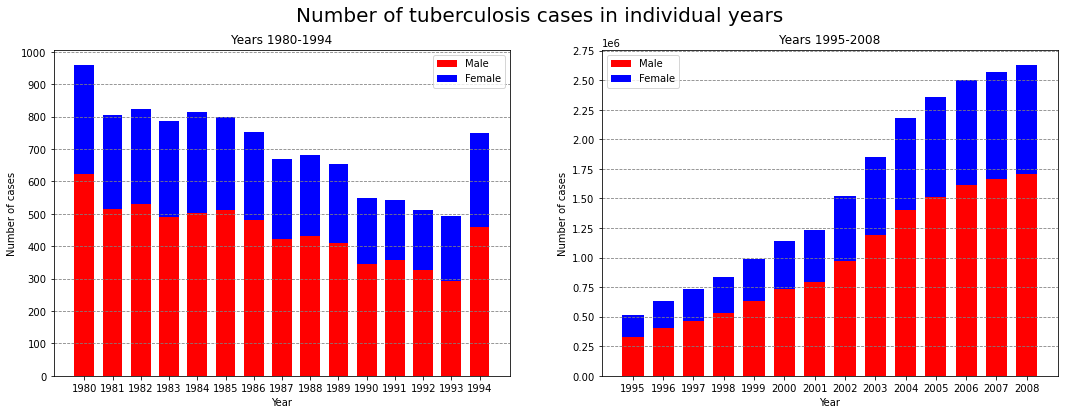

In [10]:
# Analiza danych - wykresy

# pozbycie się danych z tych przedziałów wiekowych, ponieważ te przypadki są już uwzględnione w przedziale 0-14
dff = df_sorted.drop(df_sorted[(df_sorted.age == '0-4') | (df_sorted.age == '5-14')].index)
years = dff.year.unique()
years.sort()

# ilość przypadków w poszczególnych latach 
male = []
female = []

for year in years:
    male.append(dff['cases'][(dff['year'] == year) & (dff['sex'] == 'm')].sum())
    female.append(dff['cases'][(dff['year'] == year) & (dff['sex'] == 'f')].sum())


ind = np.arange(len(years))
width = 0.7
fig, ax = plt.subplots(1, 2, figsize=(18,6))
fig.suptitle('Number of tuberculosis cases in individual years', fontsize=20)

ax[0].bar(ind[:15], male[:15], width, color='r')
ax[0].bar(ind[:15], female[:15], width, bottom=male[:15], color='b')
ax[0].set_xlabel('Year')
ax[0].set_xticks(ind[:15])
ax[0].set_xticklabels([str(year) for year in years[:15]])
ax[0].set_ylabel('Number of cases')
ax[0].set_yticks(np.arange(0, 1001, 100))
ax[0].yaxis.grid(color='gray', linestyle='dashed')
ax[0].set_title('Years 1980-1994')
ax[0].legend(labels=['Male', 'Female'])



ax[1].bar(ind[15:], male[15:], width, color='r')
ax[1].bar(ind[15:], female[15:], width, bottom=male[15:], color='b')
ax[1].set_xlabel('Year')
ax[1].set_xticks(ind[15:])
ax[1].set_xticklabels([str(year) for year in years[15:]])
ax[1].set_ylabel('Number of cases')
ax[1].set_yticks(np.arange(0, 3e6, 2.5e5))
ax[1].yaxis.grid(color='gray', linestyle='dashed')
ax[1].set_title('Years 1995-2008')
ax[1].legend(labels=['Male', 'Female'])

plt.show()


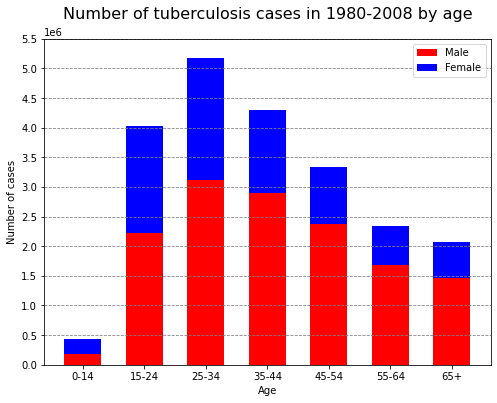

In [11]:
age = dff.age.unique()

# ilość przypadków w poszczególnych grupach wiekowych
male = []
female = []

for a in age:
    male.append(dff['cases'][(dff['age'] == a) & (dff['sex'] == 'm')].sum())
    female.append(dff['cases'][(dff['age'] == a) & (dff['sex'] == 'f')].sum())


ind = np.arange(len(age))
width = 0.6
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(ind, male, width, color='r')
ax.bar(ind, female, width, bottom=male, color='b')
ax.set_xlabel('Age')
ax.set_xticks(ind)
ax.set_xticklabels(age)
ax.set_ylabel('Number of cases')
ax.set_yticks(np.arange(0, 5.6e6, 5e5))
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_title('Number of tuberculosis cases in 1980-2008 by age', fontsize=16, pad=20)
ax.legend(labels=['Male', 'Female'])

plt.show()
